### Load Datasets

In [10]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load news data
news_df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])

# Load stock data
stock_df = pd.read_csv("../data/AAPL_historical_data.csv", parse_dates=["Date"])
stock_df.rename(columns={"Date": "date"}, inplace=True)

### Clean and Preprocess Datasets

In [3]:
# Extract necessary columns
news_df = news_df[["date", "headline", "stock"]]
stock_df = stock_df[["date", "Close"]]

# Ensure proper datetime parsing with fallback if needed
# For news_df: parse if not already datetime
if not pd.api.types.is_datetime64_any_dtype(news_df["date"]):
    news_df["date"] = pd.to_datetime(news_df["date"], errors='coerce')

# For stock_df: same treatment
if not pd.api.types.is_datetime64_any_dtype(stock_df["date"]):
    stock_df["date"] = pd.to_datetime(stock_df["date"], errors='coerce')

# Remove time component to keep only the date
news_df["date"] = news_df["date"].dt.date
stock_df["date"] = stock_df["date"].dt.date

# Drop rows with invalid dates if any
news_df.dropna(subset=["date"], inplace=True)
stock_df.dropna(subset=["date"], inplace=True)


### Analyze the Semtiment

In [4]:
# Compute sentiment polarity for each headline
news_df["sentiment"] = news_df["headline"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


### Aggregate Daily Sentiment

In [6]:
# Average sentiment per day
daily_sentiment = news_df.groupby("date")["sentiment"].mean().reset_index()

### Calculate Daily Returns

In [7]:
stock_df = stock_df.sort_values("date")
stock_df["daily_return"] = stock_df["Close"].pct_change()

### Merge Sentiment with Stock Returns

In [8]:
# Merge on date
merged_df = pd.merge(daily_sentiment, stock_df, on="date", how="inner")

### Correlation Analysis

In [9]:
correlation = merged_df["sentiment"].corr(merged_df["daily_return"])
print("Correlation between sentiment and daily return:", correlation)

Correlation between sentiment and daily return: -0.002032806477658251


### Visualization

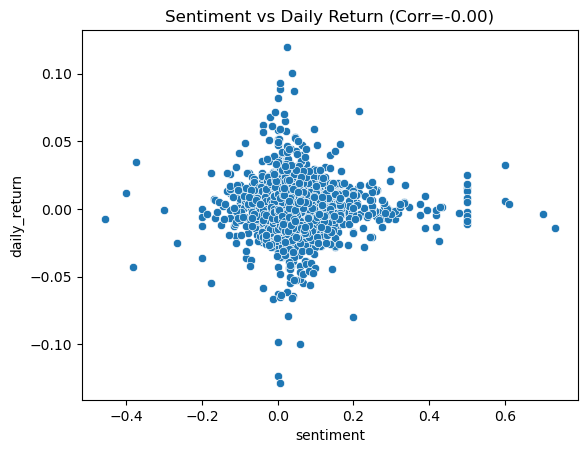

In [11]:
sns.scatterplot(data=merged_df, x="sentiment", y="daily_return")
plt.title(f"Sentiment vs Daily Return (Corr={correlation:.2f})")
plt.show()

### Save Result

In [12]:
plt.savefig("../output/Correlation_plot.png")

<Figure size 640x480 with 0 Axes>